In [ ]:
options(jupyter.rich_display = F)

# QUESTION 1: ODD INDICES (7 POINTS)

Please write a function **oddi** that takes a single argument **x**, a numeric vector and subset and return only odd-indexed elements of `x` (i.e., `x[1]`, `x[3]`, `x[5]`, etc).

Note that the vector should work with vectors of any size.



Example:
```R
> oddi(x = 4:15)
[1]  4  6  8 10 12 14

> oddi(x = 10:2)
[1] 10  8  6  4  2

```

**Hint:** You can subset by using indices or boolean values, it is up to you

Solution:

In [ ]:
oddi <- function(x) x[seq(1,length(x),2)]

oddi(x = 4:15)
oddi(x = 10:2)

# QUESTION 2: ODD VALUES (7 POINTS) 

Please write a function **oddv** that takes a single argument **x**, a numeric vector and return only odd-valued elements of **x**:

(b) Given a vector `x`, create a new vector `y` such that it has only the odd-valued elements of `x`

Example:
```R
> oddv(x = c(3,5,1,2,4,6,9))
[1] 3 5 1 9

> oddv(x = c(2, 9, 8, 8, 5, 6))
[1] 9 5
```

Solution:

In [ ]:
oddv <- function(x)
{
    x[x%%2==1]
}

oddv(x = c(3,5,1,2,4,6,9))
oddv(x = c(2, 9, 8, 8, 5, 6))

# QUESTION 3: SIMPLE SORT AND NAME (6 POINTS)

Please write a function named **sortn** that takes a single argument **x**, a numeric vector of length five, and sorts the vector in decreasing order and assigns names `A`-`E` to each element, such that `A` is the largest element, `B` second largest, and so on.

Example:
```R
> sortn(x = c(8, 1, 6, 2, 3))
A B C D E 
8 6 3 2 1 

> sortn(x = c(3, 10, 1, 7, 4))
 A  B  C  D  E 
10  7  4  3  1 
```

**Solution**

In [ ]:
sortn <- function(x)
{
    x <- sort(x, decreasing = T)
    names(x) <- LETTERS[1:5]
    return(x)
}

sortn(x = c(8, 1, 6, 2, 3))
sortn(x = c(3, 10, 1, 7, 4))

# QUESTION 4: INTERCHANGE ROWS OR COLUMNS (20 POINTS)

Write a function that takes a matrix and returns a new matrix with a pair of rows or columns interchanged.

The function should be called as `interchange(M, i, j, rows)`, where `M` is the matrix, `i` and `j` are the indices of the rows (columns) to be interchanged, and `rows` is an **optional** Boolean parameter:

If `rows` is set to `TRUE`, the function should interchange rows, else it should interchange columns. The default value of `rows` should be `TRUE`.

Examples:
```R
> M <- matrix(1:12,nrow=3)
> M
     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

> interchange(M,1,3)
     [,1] [,2] [,3] [,4]
[1,]    3    6    9   12
[2,]    2    5    8   11
[3,]    1    4    7   10

> interchange(M,1,4,rows=F)
     [,1] [,2] [,3] [,4]
[1,]   10    4    7    1
[2,]   11    5    8    2
[3,]   12    6    9    3
```

**Hint:** You will need a temporary variable to hold one of the rows/columns to be interchanged

**Solution**

In [ ]:
interchange <- function(M, i, j, rows=TRUE){
    if (rows){
        temp <- M[i,]
        M[i,] <- M[j,]
        M[j,] <- temp
    } else {
        temp <- M[,i]
        M[,i] <- M[,j]
        M[,j] <- temp
    }
    M
}

M <- matrix(1:12,nrow=3)
M
interchange(M,1,3)
interchange(M,1,4,rows=F)

# QUESTION 5: CONVERT RANGES TO NUMBERS (20 POINTS)

Suppose a reading assignment is given as a mixture of:

- Single page numbers
- and ranges of page numbers (two item vectors), e.g. "Read page 1, pages 3 to 5, page 7, and pages 13 to 16".

You can store this assignment as a list, e.g., `list(1, c(3,5), 7, (13,16))`, where:
- Single page numbers are denoted as one itemed vectors
- Ranges of page numbers are denoted as two itemed vectors. Note that the page numbers implied by the range are a sequence from the smaller value to the larger value 

Your task is to write a general function named `ranges_to_numbers(L)`. The function should take an argument  `L`, a list described as above, and return a vector of integers combining the numbers and intervals.

Example:

```R
L1 <- list(1, c(3,5), 7, c(13, 16))

> ranges_to_numbers(L = L1)
[1] 1 3 4 5 7 13 14 15 16 
```

The function should be general, that is, it should handle lists of any length. You can assume that list elements are either single integers, or integer vectors of length 2. You can also assume that the second element of range vectors is always larger.

The output should be sorted and there should be no duplicates. (Hint: Use the `sort()` and `unique()` functions before returning the resulting vector.)

Test your code with the following examples (remember that during grading we will use different test inputs):

```R
L2 <- list(10, 15, c(20,24), 30, c(40,45))

> ranges_to_numbers(L = L2)
[1] 10 15 20 21 22 23 24 30 40 41 42 43 44 45 

L3 <- list(2, -4, 5, c(7,10), -4, c(-5,-3))

> ranges_to_numbers(L = L3)
[1] -5 -4 -3 2 5 7 8 9 10 

L4 <- list(c(3,8), 1,2,3,4,5,6, c(5,10))

> ranges_to_numbers(L = L4)
[1] 1 2 3 4 5 6 7 8 9 10 
```

**Hints:**
- Initiate an empty vector to use as an accumulator of values
- Use a loop and a conditional inside the loop

**Solution**

In [ ]:
ranges_to_numbers <- function(L){
    res <- c()
    for (i in L){
        if (length(i) == 1){
            res <- c(res,i)
        } else { 
            res <- c(res, i[1]:i[2])
        }
    }
    unique(sort(res))
}
L1 <- list(1, c(3,5), 7, c(13, 16))
ranges_to_numbers(L = L1)

L2 <- list(10, 15, c(20,24), 30, c(40,45))
ranges_to_numbers(L = L2)

L3 <- list(2, -4, 5, c(7,10), -4, c(-5,-3))
ranges_to_numbers(L = L3)

L4 <- list(c(3,8), 1,2,3,4,5,6, c(5,10))
ranges_to_numbers(L = L4)

# QUESTION 6: AGGREGATE IRIS (20 POINTS)

The built-in data frame object `iris` cotains the well-known iris dataset, values on 150 plant specimens from three species: setosa, versicolar, virginica, 50 rows from each species.

```R
> head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

```

Your task is to write a function `getrow(rowind)` that takes a single argument `rowind`, a row index value. The function should return the row number `rowind` for each iris species in the dataset by aggregating it across species.

**Hints:**
* The `getrow()` function should call the `aggregate()` function applied on the `iris` object.
* The FUN argument to `aggregate()` function should be written using the `function(x) ...` notation.   

Examples:
```R
> getrow(rowind = 1)

     Species Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1     setosa          5.1         3.5          1.4         0.2     setosa
2 versicolor          7.0         3.2          4.7         1.4 versicolor
3  virginica          6.3         3.3          6.0         2.5  virginica
```

```R
> getrow(rowind = 2)

     Species Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1     setosa          4.9         3.0          1.4         0.2     setosa
2 versicolor          6.4         3.2          4.5         1.5 versicolor
3  virginica          5.8         2.7          5.1         1.9  virginica 
```


**Solution**

In [ ]:
getrow <- function(rowind)
{
    aggregate(iris, iris["Species"], function(x) x[rowind])    
}
              
getrow(rowind = 1)
getrow(rowind = 2)

# QUESTION 7: FAT TAILED DISTRIBUTION (20 POINTS)

Generate a random numeric vector using the following commands:

```R
RNGversion("3.3.1")
set.seed(10)
samp1 <- unlist(lapply(c(3,5,10), function(x) rnorm(100, 10, x)))
```

Using this vector, create the plot shown below

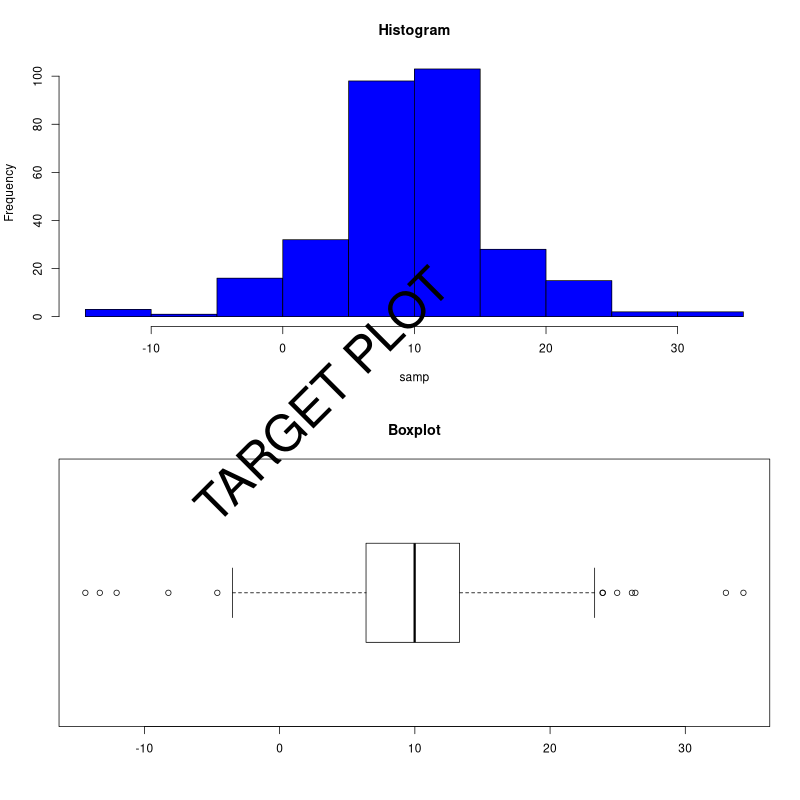

**Hints:**
* Use the `par()` function to set up a plot array with two rows and one column.
* The top plot should be a histogram with 10 bins, blue color and **Histogram** main title.
* The bottom plot should be a **horizontal** boxplot with **Boxplot** main title.
* The aspect ratio in your computer could be different; don't worry about it.

**Solution**

In [ ]:
RNGversion("3.3.1")
set.seed(10)
samp <- unlist(lapply(c(3,5,10), function(x) rnorm(100, 10, x)))

par(mfrow=c(2,1))
hist(samp, breaks=10, col = "blue", main="Histogram")
boxplot(samp,main="Boxplot",horizontal = T)